# Importando as bibliotecas necessárias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Importando o dataset principal

In [2]:
#Importing dataset
df = pd.read_csv("sharding.csv")
df.head()

,Name,Method,Dim,N_sample,nList,nprobe,DB Size (GB),Total,Time kNN,Recall@10,Train time,Add time,Move time,Erro
0,SK-1M-12d,brute,12.0,1000000.0,0.0,0.0,0.048,9.577714,9.577714443206789,-,NaN,NaN,NaN,NaN
1,SK-1M-12d,ivfflat,12.0,1000000.0,4096.0,5.0,0.048,5.126584,1.6127116680145264,0.3713362,2.336999,0.554442,0.622431,NaN
2,SK-1M-12d,ivfflat,12.0,1000000.0,4096.0,10.0,0.048,4.575897,1.40338397026062,0.5685446,1.866822,0.603858,0.701834,NaN
3,SK-1M-12d,ivfflat,12.0,1000000.0,4096.0,25.0,0.048,7.456691,4.297406911849976,0.8743484,1.915303,0.596512,0.647470,NaN
4,SK-1M-12d,ivfflat,12.0,1000000.0,4096.0,50.0,0.048,8.065535,4.993851900100708,0.9818246,1.745445,0.614529,0.711708,NaN


In [4]:
df.dtypes

Name             object
Method           object
Dim             float64
N_sample        float64
nList           float64
nprobe          float64
DB Size (GB)    float64
Total           float64
Time kNN         object
Recall@10        object
Train time      float64
Add time        float64
Move time       float64
Erro             object
dtype: object

# Separando no dataset para o método bruto

In [5]:
#Getting the brute results
df_brute = df[df['Method'] == 'brute']
df_brute.head()

,Name,Method,Dim,N_sample,nList,nprobe,DB Size (GB),Total,Time kNN,Recall@10,Train time,Add time,Move time,Erro
0,SK-1M-12d,brute,12.0,1000000.0,0.0,0.0,0.048,9.577714,9.577714443206789,-,NaN,NaN,NaN,NaN
7,SK-1M-12d,brute,12.0,1000000.0,0.0,0.0,0.048,9.576484,9.576484203338625,-,NaN,NaN,NaN,NaN
14,SK-10M-12d,brute,12.0,10000000.0,0.0,0.0,0.480,882.293358,882.2933576107025,-,NaN,NaN,NaN,NaN
21,SK-10M-12d,brute,12.0,10000000.0,0.0,0.0,0.480,883.099922,883.0999221801758,-,NaN,NaN,NaN,NaN
28,SK-20M-12d,brute,12.0,20000000.0,0.0,0.0,0.960,3541.227518,3541.2275178432465,-,NaN,NaN,NaN,NaN


# Plotando Gráficos

In [8]:
df_g = df[df['Erro'].isna()]

In [9]:
df_g = df_g[df_g['Method'] != 'brute']

## Training

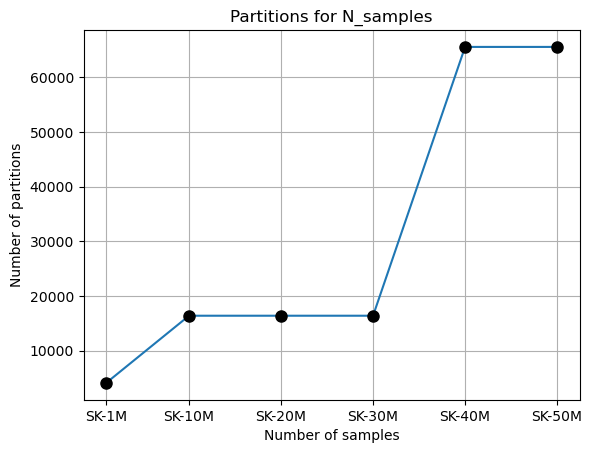

In [42]:
import math
def nlist(n):
    y = int( 2 ** ( 2 * round(math.log(n,10)) ) )
    return y

y = np.vectorize(nlist)
x = [int(1e6),int(1e7),int(2e7),int(3e7),int(4e7),int(5e7)]
plt.plot(x
,y(x),marker='o',markersize=8,markerfacecolor='black',markeredgecolor='black',linestyle='-'
)


x = [int(1e6),int(10e6),int(20e6),int(30e6),int(40e6),int(50e6)]
labels = ['SK-1M', 'SK-10M', 'SK-20M', 'SK-30M',
   'SK-40M', 'SK-50M']
plt.xticks(x, labels)

plt.xlabel('Number of samples')

plt.ylabel(f"Number of partitions")
plt.title(f'Partitions for N_samples')
plt.grid('on')



plt.show()


In [43]:
def plot_train(df_list,col,method):
    


    
    colors = ['red','green']
    
    methods = ['ivfflat','ivfpq']
    
    aux = df.drop_duplicates(subset=['Name','Method'],keep='first')
    
    fig = plt.figure(figsize=[7,5])

    
    for index,method in enumerate(methods):
        

        plt.plot(aux[aux['Method'] == method]['N_sample'],aux[aux['Method'] == method]['Train time'],
            label=f"{method.upper()}",marker='o',markersize=8,color=colors[index],markerfacecolor='black',
            markeredgecolor='black',linestyle='-'
        )


    


    
    plt.legend(loc ="lower right")
    plt.title(f'Training time')
    plt.ylabel("Time to train (s)")
    plt.xlabel('N_sample')
    x = [int(1e6),int(10e6),int(20e6),int(30e6),int(40e6),int(50e6)]
    labels = ['SK-1M', 'SK-10M', 'SK-20M', 'SK-30M',
   'SK-40M', 'SK-50M']
    plt.xticks(x, labels)
    
    plt.grid('on')

    plt.show()


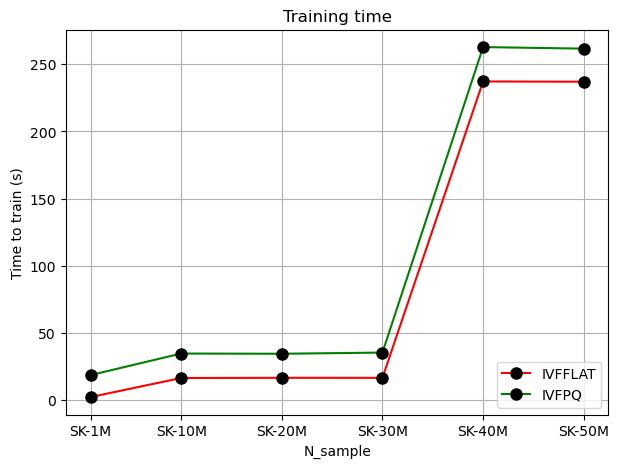

In [44]:
plot_train(df_g,'-','-')

## Função para plotar gráfico do dataframe

In [14]:
def plot_2df(df,db,col):
    
    try:
        df = df.astype({"Time kNN": float, "Recall@10": float})
    except:
        pass
    colors = ['red','green']

    methods = ['ivfflat','ivfpq']
    
    fig = plt.figure(figsize=[7,5])

    
    
    for index,method in enumerate(methods):
        nprobes = df[(df['Method'] == method) & (df['Name'] == db)]['nprobe'].unique()
        
        plt.plot(nprobes,df[(df['Method'] == method) & (df['Name'] == db)][col],
            label=method.upper(),marker='o',markersize=8,color=colors[index],markerfacecolor='black',
            markeredgecolor='black',linestyle='-'
        )


    



    plt.legend(loc ="lower right")

    x = [5,10,25,50,75,100]
    labels = x
    plt.xticks(x, labels)
    
    plt.xlabel('Nprobes')
    string = ''
    if col != 'Recall@10':
        string = ' (s)'
    plt.ylabel(f"{col}{string}")
    plt.title(f'{db}')
    plt.grid('on')
    


    plt.show()


## Gráfico do Brute

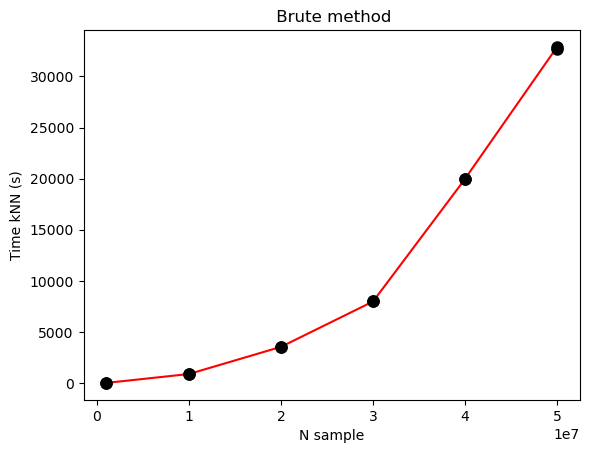

In [15]:
def plot_brute(df):
    df = df.astype({"Time kNN": float,"N_sample": int})
    plt.plot(df['N_sample'],df['Time kNN']
        ,marker='o',markersize=8,color='red',markerfacecolor='black',
        markeredgecolor='black',linestyle='-'
    )
    
    plt.title(f' Brute method')
    plt.ylabel('Time kNN (s)')
    plt.xlabel('N sample')
    
    
    
plot_brute(df_brute)

## Gráficos

### 1 MILHAO

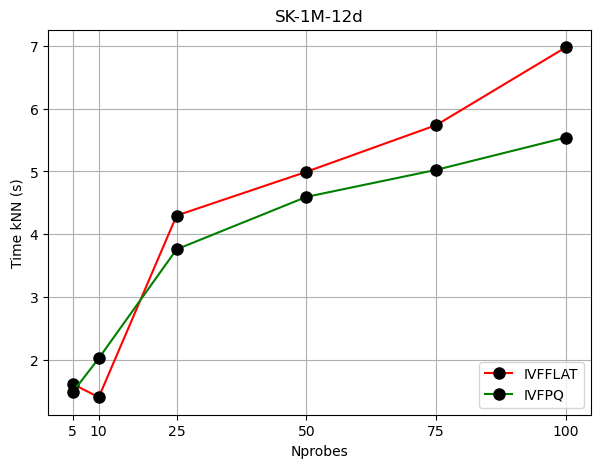

In [18]:
plot_2df(df_g,'SK-1M-12d','Time kNN')

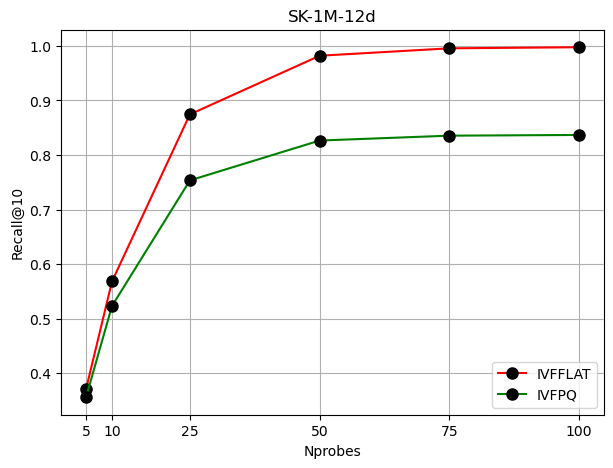

In [19]:
plot_2df(df_g,'SK-1M-12d','Recall@10')

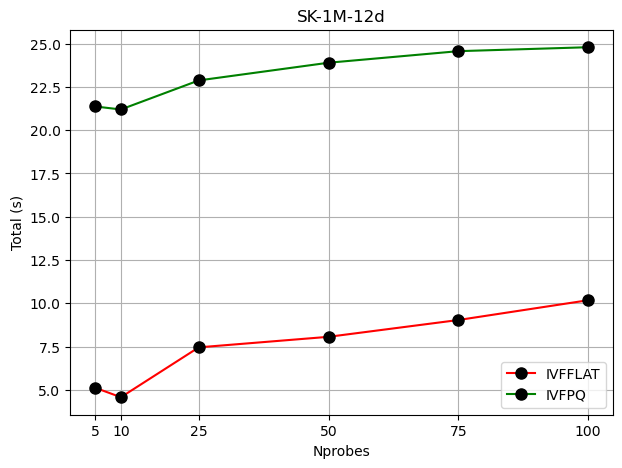

In [20]:
plot_2df(df_g,'SK-1M-12d','Total')

### 10 MILHÃO

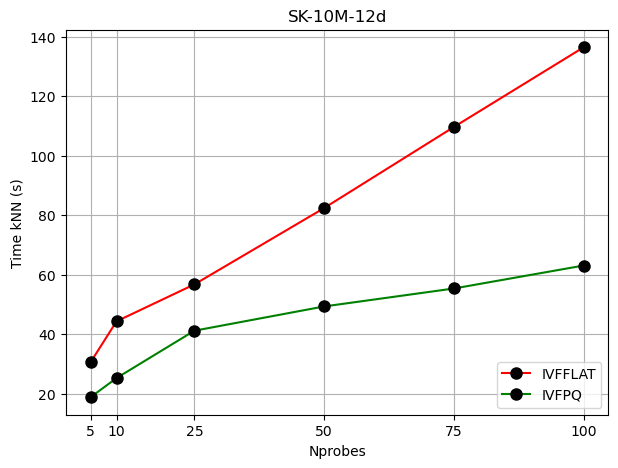

In [21]:
plot_2df(df_g,'SK-10M-12d','Time kNN')

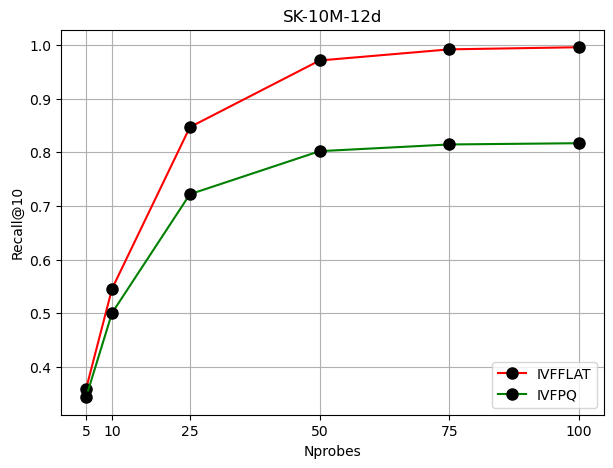

In [22]:
plot_2df(df_g,'SK-10M-12d','Recall@10')

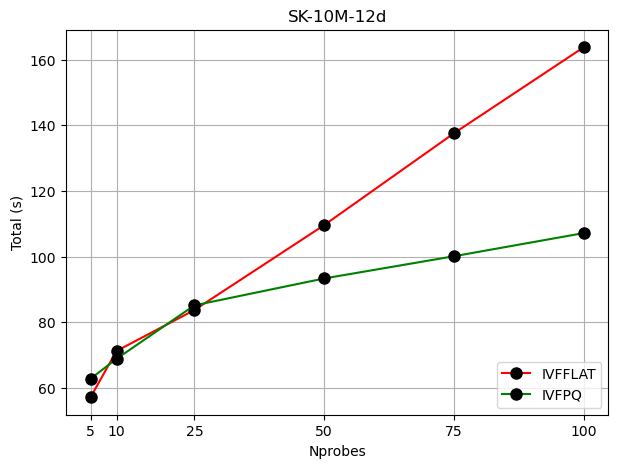

In [23]:
plot_2df(df_g,'SK-10M-12d','Total')

### 20 MILHÃO

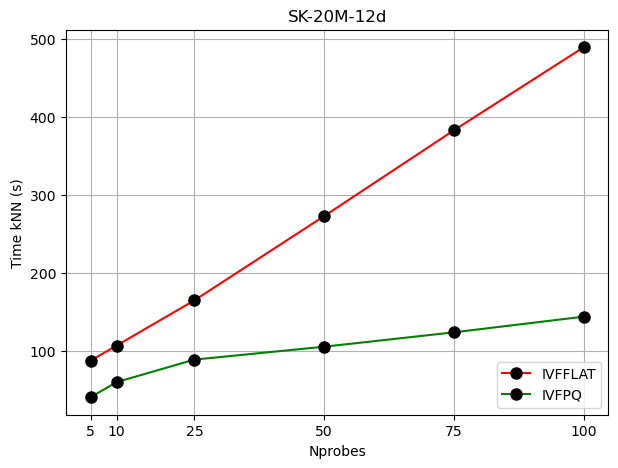

In [24]:
plot_2df(df_g,'SK-20M-12d','Time kNN')

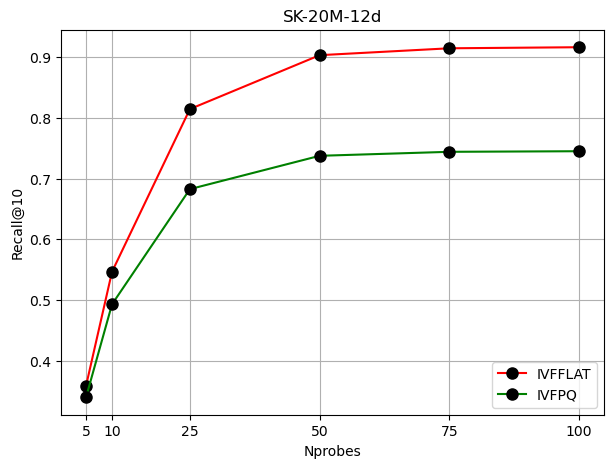

In [25]:
plot_2df(df_g,'SK-20M-12d','Recall@10')

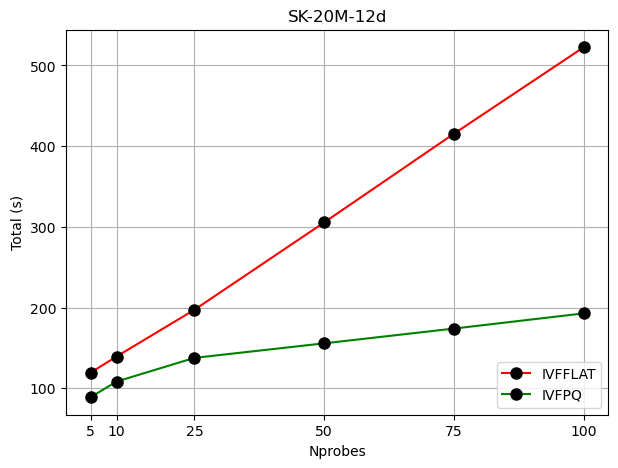

In [26]:
plot_2df(df_g,'SK-20M-12d','Total')

### 30 MILHÃO

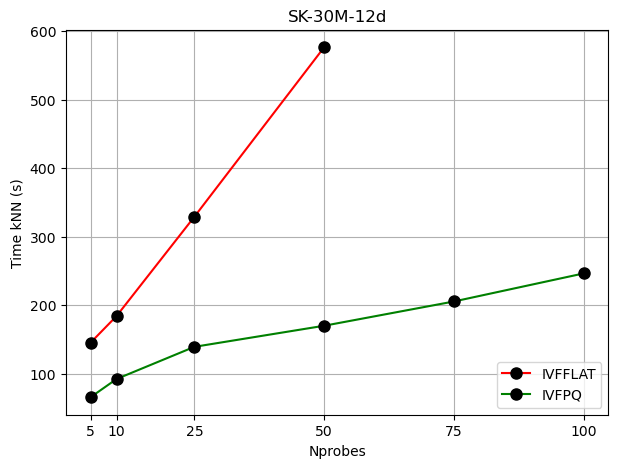

In [27]:
plot_2df(df_g,'SK-30M-12d','Time kNN')

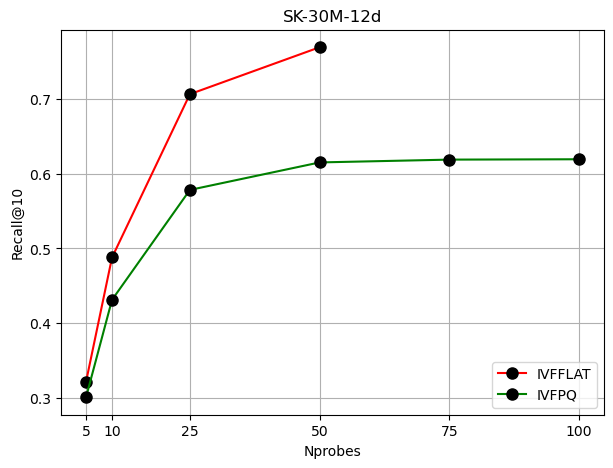

In [28]:
plot_2df(df_g,'SK-30M-12d','Recall@10')

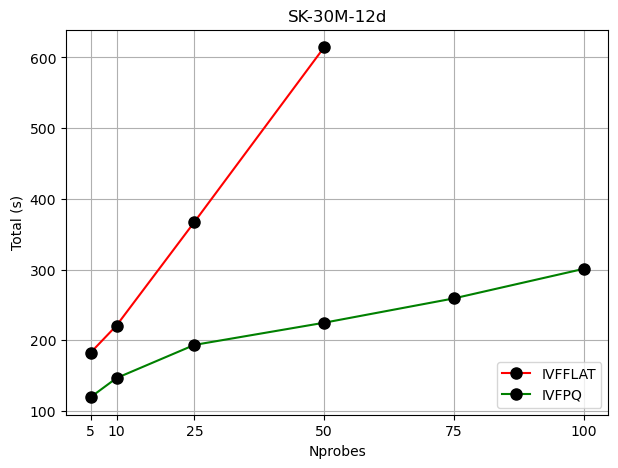

In [29]:
plot_2df(df_g,'SK-30M-12d','Total')

### 40 MILHÃO

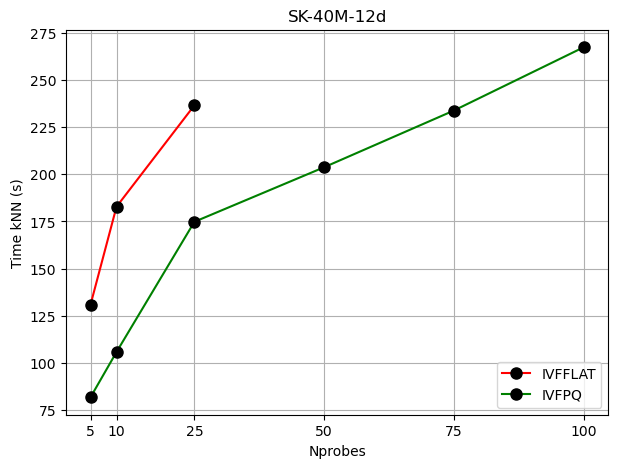

In [30]:
plot_2df(df_g,'SK-40M-12d','Time kNN')

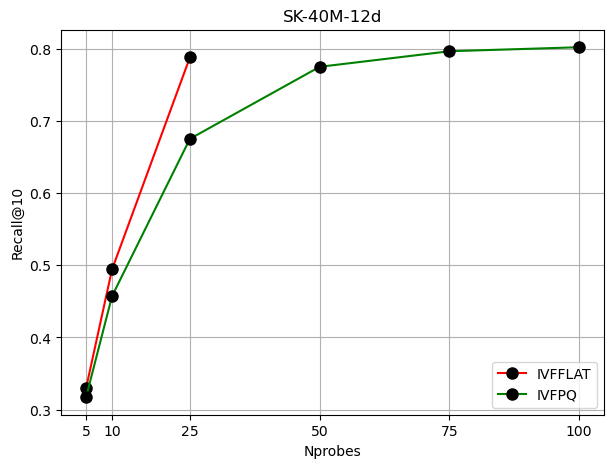

In [31]:
plot_2df(df_g,'SK-40M-12d','Recall@10')

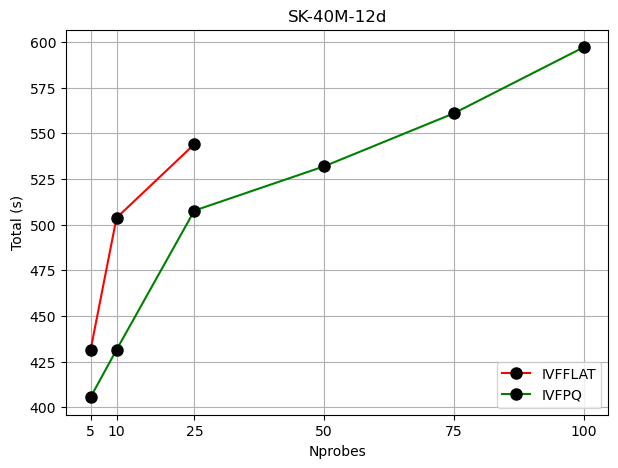

In [32]:
plot_2df(df_g,'SK-40M-12d','Total')

### 50 MILHÃO

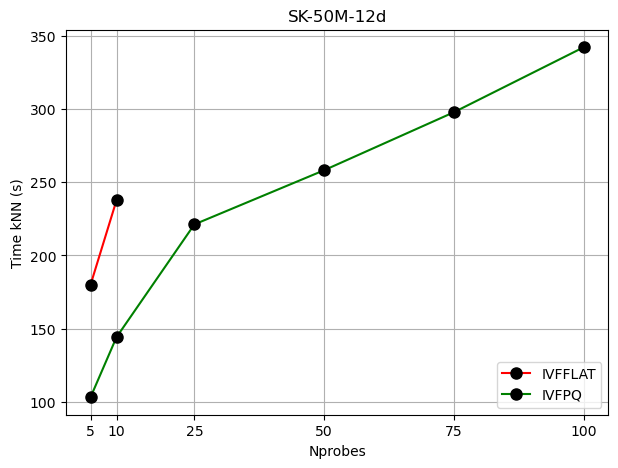

In [33]:
plot_2df(df_g,'SK-50M-12d','Time kNN')

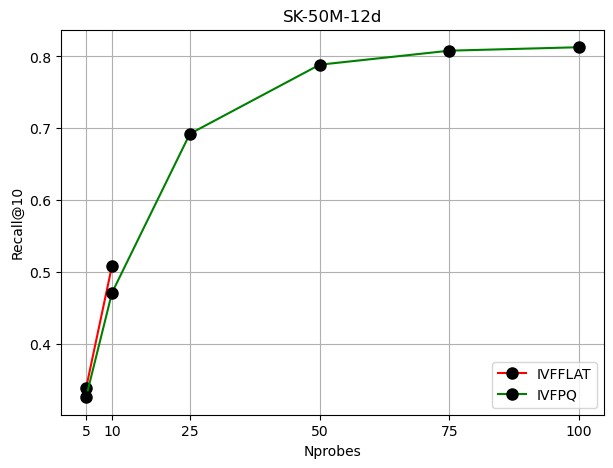

In [34]:
plot_2df(df_g,'SK-50M-12d','Recall@10')

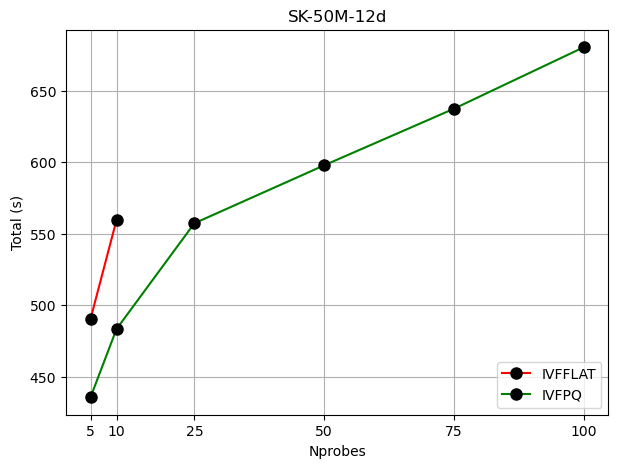

In [35]:
plot_2df(df_g,'SK-50M-12d','Total')

## Check complexity

In [61]:
time_pq = {}
time_ff = {}
n = [int(1e6),int(1e7),int(2e7),int(3e7),int(4e7),int(5e7)]

In [62]:
method = 'ivfpq'

nprobes = [5,10,25,50,75,100]
for i in nprobes:
    aux = df_g[(df_g['Method'] == method) & (df_g['nprobe'] == i)]['Time kNN'].values
    time_pq[str(i)] = list(aux)

In [63]:
method = 'ivfflat'

nprobes = [5,10,25,50,75,100]
for i in nprobes:
    aux = df_g[(df_g['Method'] == method) & (df_g['nprobe'] == i)]['Time kNN'].values
    time_ff[str(i)] = list(aux)

In [65]:
def complexidade(t0,n0,tf,nf):
    import math
    b = tf / t0
    a = nf / n0
    
    x = math.log(b,a)
    return x

In [81]:

for j in ['5','10','25','50','75','100']:
    for index,val in enumerate(time_pq[j]):
        if index == 0:
            continue

        t0 = float(time_pq[j][index-1])
        n0 = n[index-1]

        tf = float(val)
        nf = n[index]

        comp = complexidade(t0,n0,tf,nf)
        print(f"{index} -> Complexidae; {comp}")
    print("\n\n\n")

1 -> Complexidae; 1.1037670496430247
2 -> Complexidae; 1.097942386023034
3 -> Complexidae; 1.208421597985018
4 -> Complexidae; 0.7451085659860064
5 -> Complexidae; 1.034280637882085




1 -> Complexidae; 1.0975867663078478
2 -> Complexidae; 1.2390157709016536
3 -> Complexidae; 1.0782263608700604
4 -> Complexidae; 0.46403397924436135
5 -> Complexidae; 1.38598562542711




1 -> Complexidae; 1.0400391498064911
2 -> Complexidae; 1.1049362526476214
3 -> Complexidae; 1.1177496176750112
4 -> Complexidae; 0.7837879055860524
5 -> Complexidae; 1.05589037157321




1 -> Complexidae; 1.0312691845151185
2 -> Complexidae; 1.091176860571695
3 -> Complexidae; 1.1876483410175969
4 -> Complexidae; 0.6239046463401181
5 -> Complexidae; 1.0635121712484297




1 -> Complexidae; 1.0424187614323894
2 -> Complexidae; 1.1581212136186065
3 -> Complexidae; 1.254887150417869
4 -> Complexidae; 0.4457922908108614
5 -> Complexidae; 1.0870094148670137




1 -> Complexidae; 1.056649655413584
2 -> Complexidae; 1.1867316